<div class="alert alert-block alert-info" >
    <h1>Machine Learning: Assignment 2</h1>
    <h2>This is a two week assignment</h2>
    <h3>General Information:</h3>
    <p>Feel free to add cells if required.<br> Feel free to write your own function block to reduce the redundancy.<br> Answers belong into the corresponding cells (below the question). <br><br> If you encounter empty cells underneath the answer that can not be edited, please ignore them, they are for testing purposes.<br><br>When editing an assignment there can be the case that there are variables in the kernel. To make sure your assignment works, please restart the kernel and run all cells before submitting (e.g. via <i>Kernel -> Restart & Run All</i>). We don't consider that respective solution if you make this mistake (no excuse).</p>
    <br><br><b> Plot should have axis labels, grid, legend, title, atleast size 10X10 .Also give proper comments, function name, variable names to your coding, if you didn't follow the instructions there will be a reduction in the points.</b><br><br> 
     <br><br><b> Write sudo-code if you didn't get output or left out of time so that you will be awarded with atmost 50% of marks for that particular session.</b><br><br>
    <h3>Submission:</h3>
    <p>Use the following naming convention for your submissions: LA_FirstnameLastname_dateOfLecture, e.g LA_JohnDoe_YYMMDD
     <br><br>Please submit your notebook via LEA. The assignment is due on <b>$1^{st}$ May, Saturday at 18:00.</b> </p>
    <h3>Group Work:</h3>
    <p>You are allowed to work in groups of up to two people. Please enter the UID (your username here) of each member of the group into the next cell. We apply plagiarism checking, so do not submit solutions from other people except your team members. If an assignment has a copied solution, the task will be graded with 0 points for all people with the same solution.</p>
    <p><b>YOU SHOULD ONLY SUBMIT EXACTLY ONE PER GROUP</b></p>
    <h3>Questions about the Assignment:</h3>
    <p>If you have questions about the assignment please post them in the LEA forum before the deadline. Don't wait until the last day to post questions.</p></div>

In [1]:
'''
Group Work:
Enter the UID (i.e. student2s) of each team member into the variables. 
If you work alone please leave the second variable empty, or extend the list if necessary.
'''
member1 = 'sdeuss2s'
member2 = 'mhelap2s'

# Build a spam classifier using Naive Bayes[100 points]

In [2]:
#Headers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import seaborn as sns
import sklearn
#Include your other headers here
import csv
from typing import List, Dict
from classifier import NaiveBayesClassifier

from nltk import download
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords

# needs to download Lemmatizer dataset!
_ = download('wordnet')
_ = download('stopwords')

from wordcloud import WordCloud
import copy

[nltk_data] Downloading package wordnet to /home/malika/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/malika/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Step 1:- Load your data[10 points]
#### There are three datasets for training: TrainDataset1.csv, TrainDataset2.csv and TrainDataset3.txt. Each dataset contains short messages with the labels (ham or spam). Load the dataset using pandas.

In [3]:
# NOT USING PANDAS - i dont find it useful in this case! 
# Renamed function to be consisten with python naming conventions.
def load_data() -> List[Dict[str, str]]:
    
    raw_data = []

    with open("TrainDataset1.csv", "r") as f:
        reader = csv.reader(f)

        # do not need the header
        next(reader)

        for row in reader:
            raw_data.append({"type": row[0], "text": row[1]})
        
    size = len(raw_data)
    print(f"Found {size} entries in 'TrainDataset1.csv'.")

    
    with open("TrainDataset2.csv", "r") as f:
        reader = csv.reader(f)
                
        # do not need the header
        next(reader)
        
        for row in reader:
            raw_data.append({"type": row[0], "text": row[1]})
            
            
    print(f"Found {len(raw_data) - size} entries in 'TrainDataset2.csv'.")
    size = len(raw_data)
    
    
    with open("TrainDataset3.txt", "r") as f:
        reader = csv.reader(f)
                      
        for row in reader:
            splitted = row[0].split("\t")
            raw_data.append({"type": splitted[0], "text": splitted[1]})
            
            
    print(f"Found {len(raw_data) - size} entries in 'TrainDataset3.txt'.")

    
    return raw_data




raw_data = load_data()
count_spams = len([1 for row in raw_data if row['type'] == "spam"])

print(f"Dataset contains {count_spams} spam entries and {len(raw_data)-count_spams} valid entries.")

Found 5559 entries in 'TrainDataset1.csv'.
Found 4457 entries in 'TrainDataset2.csv'.
Found 5574 entries in 'TrainDataset3.txt'.
Dataset contains 2083 spam entries and 13507 valid entries.


## Step 2:- Preprocess the data[20 points]
#### Analyse the data, for this you will need to process the text, namely remove punctuation and stopwords, and then create a list of clean text words (Research how to do this [Hint:- see how the texts are pre-processed in Natural Language Processing]) use any libraries that you feel comfortable. Now Combine them into one big data set for the training.

In [4]:
def clean_text(text, *, tokenizer, lemmatizer, stop_words, min_word_length):
    tokenized = tokenizer.tokenize(text)
    lemmatized = [lemmatizer.lemmatize(token) for token in tokenized]
    normalized = [word.lower() for word in lemmatized if word.isalpha() and word not in stop_words]
    min_length_words = [word for word in normalized if len(word) > min_word_length]
    return min_length_words

def pre_process(raw_data: List[Dict[str, str]], min_word_length: int = 2) -> List[Dict]:
    tokenizer = WordPunctTokenizer()
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    
    cleaned_data = []
    
    for entry in raw_data:
        words = clean_text(entry["text"], 
                           tokenizer=tokenizer,
                           lemmatizer=lemmatizer, 
                           stop_words=stop_words,
                           min_word_length=min_word_length)

        cleaned_data.append({"type": entry["type"], "words": words})
           

    return cleaned_data


cleaned_data = pre_process(raw_data)
print(f"Got {len(cleaned_data)} entries")

Got 15590 entries


## Step 3:- Visualise the data[20 points]
#### Try to visualize and analyse the data such as before and after pre processing, number of ham/spam etc. Analyse as many verticals you can, feel free to use graphical libraries like seaborn.

In [5]:
print(raw_data[0])
pandified_raw_data=pd.DataFrame.from_dict(raw_data)

print(pandified_raw_data.head(4))



{'type': 'ham', 'text': 'Hope you are having a good week. Just checking in'}
   type                                               text
0   ham  Hope you are having a good week. Just checking in
1   ham                            K..give back my thanks.
2   ham        Am also doing in cbe only. But have to pay.
3  spam  complimentary 4 STAR Ibiza Holiday or £10,000 ...


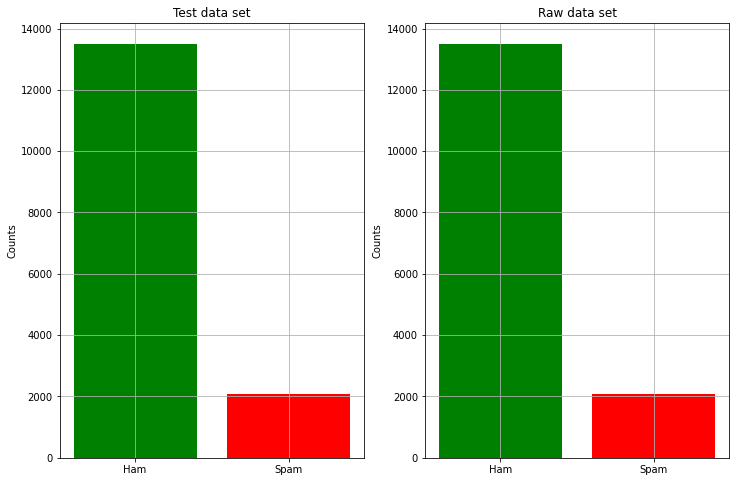

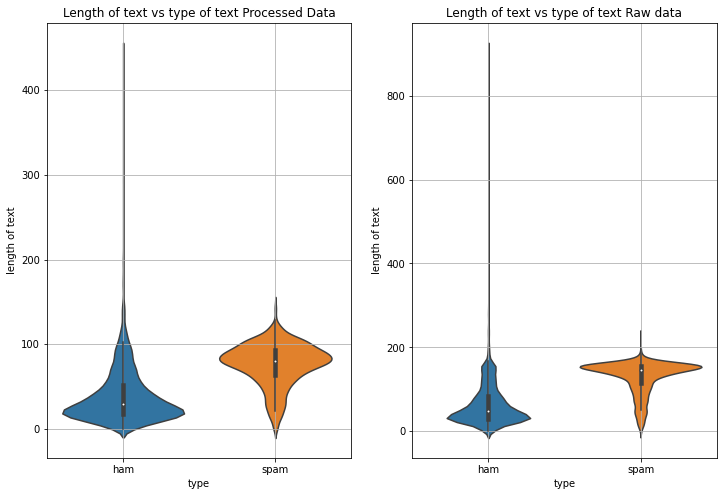

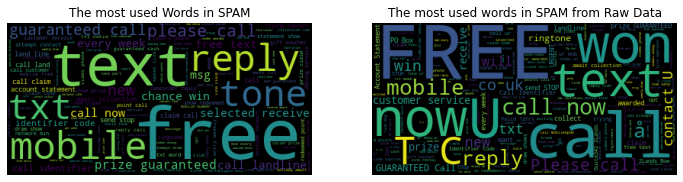

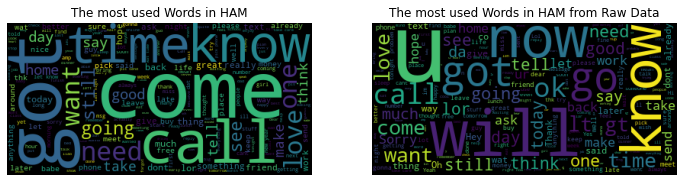

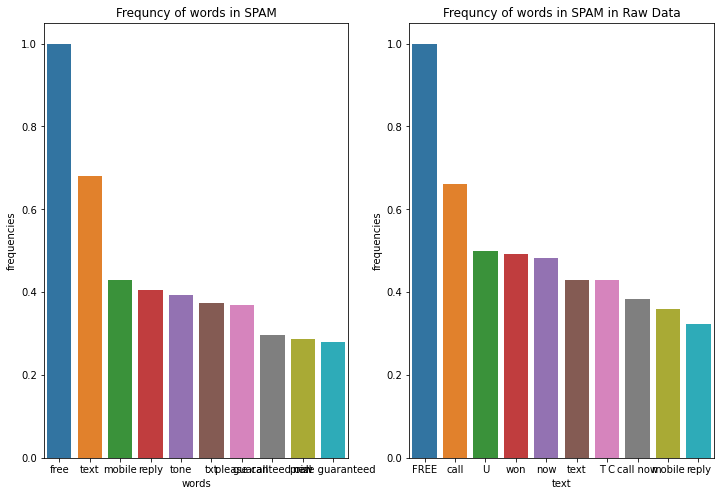

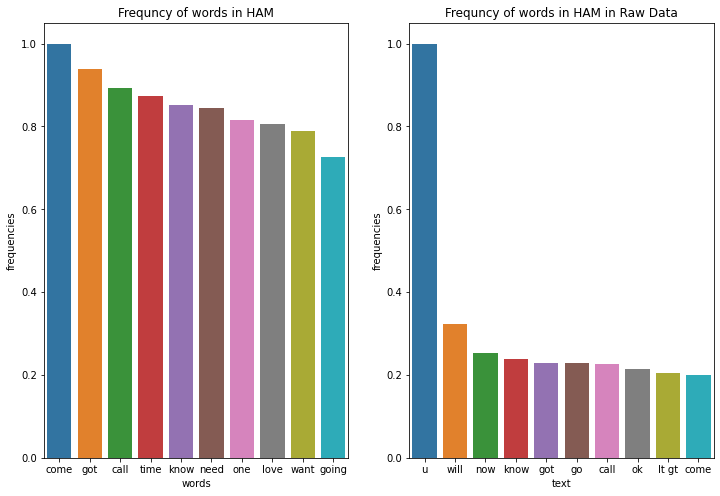

In [6]:
## Convert to a panda data frame for easy data handling
visuliasation_dict=copy.deepcopy(cleaned_data) 
raw_data_panda=copy.deepcopy(raw_data)

for index,text in enumerate(visuliasation_dict):
    ##Detokenise the words
    visuliasation_dict[index]['words']=' '.join(text['words'])
    
   
    

pandified_train_data=pd.DataFrame.from_dict(visuliasation_dict)
pandified_raw_data=pd.DataFrame.from_dict(raw_data_panda)




ham_count_raw,spam_count_raw=pandified_raw_data['type'].value_counts()
ham_count,spam_count=pandified_train_data['type'].value_counts()

## Bar graph
figure1=plt.figure(figsize=(12,8))

ax1=figure1.add_subplot(121)
ax1.bar(['Ham','Spam'],[ham_count,spam_count],color=['green', 'red'])
ax1.set(title='Test data set',ylabel='Counts')
ax1.grid()

ax2=figure1.add_subplot(122)
ax2.bar(['Ham','Spam'],[ham_count_raw,spam_count_raw],color=['green', 'red'])
ax2.set(title='Raw data set',ylabel='Counts')
ax2.grid()


## Violin Plots

figure2=plt.figure(figsize=(12,8))
ax3=figure2.add_subplot(121)
word_length_visualizations = pandified_train_data.copy()
word_length_visualizations["length of text"] = word_length_visualizations["words"].apply(lambda x: len(x))
ax3.set(title='Length of text vs type of text Processed Data')
ax3=sns.violinplot(x="type",y="length of text",data=word_length_visualizations)
ax3.grid()


ax4=figure2.add_subplot(122)
word_length_visualizations_raw = pandified_raw_data.copy()
word_length_visualizations_raw["length of text"] = word_length_visualizations_raw["text"].apply(lambda x: len(x))
ax4.set(title='Length of text vs type of text Raw data')
ax4=sns.violinplot(x="type",y="length of text",data=word_length_visualizations_raw)
ax4.grid()



## Most used words

figure3=plt.figure(figsize=(12,8))
ax5=figure3.add_subplot(121)
spamText = ""
for text in pandified_train_data['words'][pandified_train_data['type'] == 'spam']:
    spamText += text

spamcloud = WordCloud().generate(spamText)
ax5.imshow(spamcloud)
ax5.set(title="The most used Words in SPAM")
ax5.axis("off")


ax6=figure3.add_subplot(122)
spamText_raw = ""
for text in pandified_raw_data['text'][pandified_raw_data['type'] == 'spam']:
    spamText_raw += text

spamcloud_raw = WordCloud().generate(spamText_raw)
ax6.imshow(spamcloud_raw)
ax6.set(title="The most used words in SPAM from Raw Data")
ax6.axis("off")








figure4=plt.figure(figsize=(12,8))
ax7=figure4.add_subplot(121)
hamText = ""
for text in pandified_train_data['words'][pandified_train_data['type'] == 'ham']:
    hamText += text

hamcloud = WordCloud().generate(hamText)
ax7.imshow(hamcloud)
ax7.set(title="The most used Words in HAM")
ax7.axis("off")


ax8=figure4.add_subplot(122)
hamText_raw = ""
for text in pandified_raw_data['text'][pandified_raw_data['type'] == 'ham']:
    hamText_raw += text

hamcloud_raw = WordCloud().generate(hamText_raw)
ax8.imshow(hamcloud_raw)
ax8.set(title="The most used Words in HAM from Raw Data")
ax8.axis("off")








## Word frequency


##For Spam
df_spam_frquency = pd.DataFrame()
df_spam_frquency['words'] = spamcloud.words_.keys()
df_spam_frquency['frequencies'] = spamcloud.words_.values()

df_spam_frquency_raw = pd.DataFrame()
df_spam_frquency_raw['text'] = spamcloud_raw.words_.keys()
df_spam_frquency_raw['frequencies'] = spamcloud_raw.words_.values()

figure5=plt.figure(figsize=(12,8))
ax9=figure5.add_subplot(121)
ax9=sns.barplot(x='words', y='frequencies', data=df_spam_frquency.sort_values(by=['frequencies'], ascending=[0]).head(10))
ax9.set(title="Frequncy of words in SPAM")


ax10=figure5.add_subplot(122)
ax10=sns.barplot(x='text', y='frequencies', data=df_spam_frquency_raw.sort_values(by=['frequencies'], ascending=[0]).head(10))
ax10.set(title="Frequncy of words in SPAM in Raw Data")



##For Ham
df_ham_frquency = pd.DataFrame()
df_ham_frquency['words'] = hamcloud.words_.keys()
df_ham_frquency['frequencies'] = hamcloud.words_.values()


df_ham_frquency_raw = pd.DataFrame()
df_ham_frquency_raw['text'] = hamcloud_raw.words_.keys()
df_ham_frquency_raw['frequencies'] = hamcloud_raw.words_.values()


figure6=plt.figure(figsize=(12,8))
ax11=figure6.add_subplot(121)
ax11=sns.barplot(x='words', y='frequencies', data=df_ham_frquency.sort_values(by=['frequencies'], ascending=[0]).head(10))
ax11.set(title="Frequncy of words in HAM")

ax12=figure6.add_subplot(122)
ax12=sns.barplot(x='text', y='frequencies', data=df_ham_frquency_raw.sort_values(by=['frequencies'], ascending=[0]).head(10))
ax12.set(title="Frequncy of words in HAM in Raw Data")



plt.show()

## Step 4:- Build, train and validate the classifer, [20 points]

### Training on supervised data (labelled data)

#### Use the data in order to build your own Naive Bayes classifier (You can either use existing Naive Bayes from sklearn or build your own). Build the classifier, train it and then validate. Provide your result in confusion matrix (use heatmap from seaborn) along with the classification report from sklearn. Validation accuracy should be around 99%.

In [7]:
from typing import NamedTuple

class Result():
    def __init__(self, *, word: str, count: int = 0, count_spam: int = 0, count_ham: int = 0):
        self.word = word
        self.count = count
        self.count_spam = count_spam
        self.count_ham = count_ham
        self.freq_spam = 0.0
        self.freq_ham = 0.0
        
           
    @classmethod
    def from_spam(cls, word):
        return Result(word=word, count=1, count_spam=1)
        
    @classmethod
    def from_ham(cls, word):
        return Result(word=word, count=1, count_ham=1)
    
    def add_spam(self):
        self.count += 1
        self.count_spam += 1   
    
    def add_ham(self):
        self.count += 1
        self.count_ham += 1
        
    def __repr__(self) -> str:
        return f"{self.word} - freq_spam: {round(self.freq_spam, 2)}, freq_ham: {round(self.freq_ham, 2)}, count: {self.count}, spam: {self.count_spam}, hams: {self.count_ham}"
    
    def calculate_frequencies(self):
        self.freq_spam = float(self.count_spam) / float(self.count)
        self.freq_ham = float(self.count_ham) / float(self.count)
        
    
class SpamFilter():
    def __init__(self):
        self.corpus = {}
        self.tokenizer = None
        self.lemmatizer = None
        self.stop_words = None
        
    def fit(self, cleaned_data, *, min_occurences: int = 20, show_output: bool = True):
        counts = {}

        for row in cleaned_data:
            for word in row['words']:
                if word not in counts:
                    if row["type"] == "spam":
                        counts[word] = Result.from_spam(word)
                    else:
                        counts[word] = Result.from_ham(word)
                else:
                    if row["type"] == "spam":
                        counts[word].add_spam()
                    else:
                        counts[word].add_ham()

        for word, result in counts.items():
            if result.count > min_occurences:
                result.calculate_frequencies()
                self.corpus[word] = result 
                 
        print(f"Created corpus with {len(self.corpus.keys())} entries (with minimun {min_occurences} occurences)")
        
        if show_output:

            list_corpus = [value for key, value in self.corpus.items()]

            print("\n\nTop ten most used words")
            list_corpus.sort(key=lambda x: x.count, reverse=True)
            for w in list_corpus[:10]:
                print(w)


            print("\n\nTop ten least used words")
            list_corpus.sort(key=lambda x: x.count)
            for w in list_corpus[:10]:
                print(w)

            print("\n\n")
            print("-"*20)


            print("\n\nTop ten most used words in spam")
            list_corpus.sort(key=lambda x: x.count_spam, reverse=True)
            for w in list_corpus[:10]:
                print(w)

            print("\n\nTop ten most likely words in spam")
            list_corpus.sort(key=lambda x: x.freq_spam, reverse=True)
            for w in list_corpus[:10]:
                print(w)

            print("\n\nTop ten most used words in ham")
            list_corpus.sort(key=lambda x: x.count_ham, reverse=True)
            for w in list_corpus[:10]:
                print(w)

            print("\n\nTop ten most likely words in ham")
            list_corpus.sort(key=lambda x: x.freq_ham, reverse=True)
            for w in list_corpus[:10]:
                print(w)
    
    def _clean_text(self, text: str, *, min_word_length: int = 2):    
        if not self.tokenizer or not self.lemmatizer or not self.stop_words:
            self.tokenizer = WordPunctTokenizer()
            self.lemmatizer = WordNetLemmatizer()
            self.stop_words = set(stopwords.words('english'))
            
        tokenized = self.tokenizer.tokenize(text)
        lemmatized = [self.lemmatizer.lemmatize(token) for token in tokenized]
        normalized = [word.lower() for word in lemmatized if word.isalpha() and word not in self.stop_words]
        min_length_words = [word for word in normalized if len(word) > min_word_length]
        return min_length_words
                    
            
                
    def predict(self, text: str):
        words = self._clean_text(text)
        
        known_words = []
        for word in words:
            if word in self.corpus:
                known_words.append(self.corpus[word])
                
        prob_spam = 1
        prob_ham = 1
        
        for word in known_words:
            prob_spam *= word.freq_spam
            prob_ham *= word.freq_ham
        
        if prob_spam > prob_ham:
            return "spam"
        else:
            return "ham"
            
        
        
spam_filter = SpamFilter()
spam_filter.fit(cleaned_data, show_output=False, min_occurences=10)




raw_data = []     
with open("SMSSpamCollection.txt", "r") as f:
    reader = csv.reader(f)

    for row in reader:
        splitted = row[0].split("\t")
        raw_data.append({"type": splitted[0], "text": splitted[1]})

        
    
correct = 0   
for r in raw_data:
    prediction = spam_filter.predict(r['text'])
    if r['type'] == prediction:
        correct += 1
    #print(f"Truth: {r['type']} predict: {prediction}")
    
print(correct, len(raw_data), correct / len(raw_data))


Created corpus with 1672 entries (with minimun 10 occurences)
5438 5574 0.9756010046645138


## Step 5:- Test the classifier[10 points]

### Supervised classification[5 points] 

#### Test your Classifier using  the SMSSpamCollection.txt dataset provide a heatmap and classification report. Test accuracy should be around 99%.


In [8]:
# Test the classifier
#your code here

### Unsupervised classification[5 points] 

#### Test your Classifier using  the TestDataset.csv dataset. This dataset is not labelled so kindly predict the labels and visualise it[5 points].

In [9]:
# Test the classifier
#your code here

## Step 6:- Cheat the classifier[20 points]

#### Try to cheat the classifier by adding "good words" to the end of test dataset(TestDataset.csv) e.g:- Oh! no share Market has fallen down by $100,000 due to Corona outbreak... try mixing up spam and ham words see how the classifier works. Output the results in a good format to validate your work[15 points]  

In [10]:
# Cheat the classifier
#your code here

#### Write your analysis of how you intended to cheat the classifier and how it performed in few words (provide your inference)[5 points]

**Give your expalanation here**

### Help

<a href="https://en.wikipedia.org/wiki/Naive_Bayes_spam_filtering" target="_top">Spam Filtering using Naive Bayes</a><br>
<a href="https://seaborn.pydata.org/generated/seaborn.heatmap.html" target="_top">Seaborn Heatmap</a><br>
<a href="https://scikit-learn.org/stable/modules/naive_bayes.html" target="_top">Sklearn Naive Bayes</a><br>
<a href="https://scikit-learn.org/stable/modules/model_evaluation.html" target="_top">Sklearn Metrics</a><br>
<a href="https://pandas.pydata.org/docs/getting_started/index.html#getting-started" target="_top">Intro to Pandas</a>